In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,  Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE

In [9]:
#Dataset Exploration and Understanding

In [10]:
def load_text_file(file_path):
  texts = []
  labels = []
  with open(file_path, encoding='utf-8') as file:
    for line in file:
      label = 0 if line.startswith('__label__1') else 1
      labels.append(label)
      text = line[10:].strip()
      texts.append(text)
  return texts, labels
train_texts,train_labels = load_text_file('train.ft.txt')
test_texts,test_labels = load_text_file('test.ft.txt')

In [11]:
print(train_texts)

['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^', "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.", 'Amazing!: This soundtrack is my favorite music of all t

In [12]:
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(train_texts)

In [13]:
#Number of Unique Vocabs
vocab_size = tokenizer.word_index
print(f'Found {len(vocab_size)} unique vocab')

Found 21459 unique vocab


In [14]:
# Each vocab with it's index
word_counts = tokenizer.word_counts
print(list(word_counts.items()))

[('stuning', 1), ('even', 659), ('for', 4106), ('the', 19014), ('non', 72), ('gamer', 2), ('this', 7115), ('sound', 203), ('track', 90), ('was', 3413), ('beautiful', 114), ('it', 7874), ('paints', 5), ('senery', 1), ('in', 4595), ('your', 799), ('mind', 109), ('so', 1593), ('well', 669), ('i', 10022), ('would', 1097), ('recomend', 19), ('to', 9103), ('people', 379), ('who', 701), ('hate', 60), ('vid', 1), ('game', 228), ('music', 422), ('have', 2440), ('played', 67), ('chrono', 5), ('cross', 16), ('but', 2809), ('out', 1056), ('of', 7617), ('all', 1502), ('games', 42), ('ever', 409), ('has', 1001), ('best', 512), ('backs', 2), ('away', 172), ('from', 1184), ('crude', 14), ('keyboarding', 1), ('and', 10079), ('takes', 109), ('a', 9484), ('fresher', 2), ('step', 26), ('with', 2709), ('grate', 1), ('guitars', 10), ('soulful', 5), ('orchestras', 1), ('impress', 9), ('anyone', 254), ('cares', 13), ('listen', 142), ('soundtrack', 44), ('anything', 163), ("i'm", 450), ('reading', 369), ('lot'

In [15]:
# Max Sequence length
sequence_lengths = [len(tokens) for tokens in tokenizer.texts_to_sequences(train_texts)]
print(f'Max sequence length: {max(sequence_lengths)}')

Max sequence length: 202


In [16]:
# EDA

In [17]:
# Calculate the length of each sequence
sequences = tokenizer.texts_to_sequences(train_texts)
sequence_lengths = [len(sequences) for sequence in sequences]
print(sequence_lengths)

[4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 4722, 472

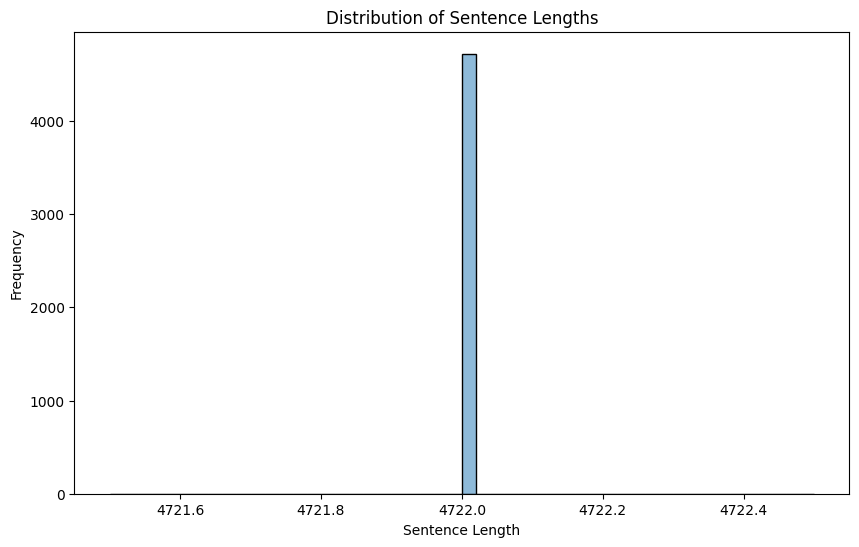

In [18]:
# Distribution of Sentence Lengths and it's frequency
plt.figure(figsize=(10, 6))
sns.histplot(sequence_lengths, bins=50, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Calculate the average mean and median lenghts of the sequence
average_length = np.mean(sequence_lengths)
median_length = np.median(sequence_lengths)
print(f'Average Sentence Length: {average_length:.2f}')
print(f'Median Sentence Length: {median_length}')

Average Sentence Length: 4722.00
Median Sentence Length: 4722.0


In [20]:
# Generate the most common and rare words
word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
print("Most common words:")
for word, freq in sorted_word_counts[:10]:
    print(f"{word}: {freq}")

# Rarest words
print("\nRarest words:")
for word, freq in sorted_word_counts[-10:]:
    print(f"{word}: {freq}")

Most common words:
the: 19014
and: 10079
i: 10022
a: 9484
to: 9103
it: 7874
of: 7617
this: 7115
is: 6501
in: 4595

Rarest words:
pandora: 1
medusa: 1
youthful: 1
princess: 1
constellation: 1
constellations: 1
stargazing: 1
oedipus: 1
unsuitable: 1
thare: 1


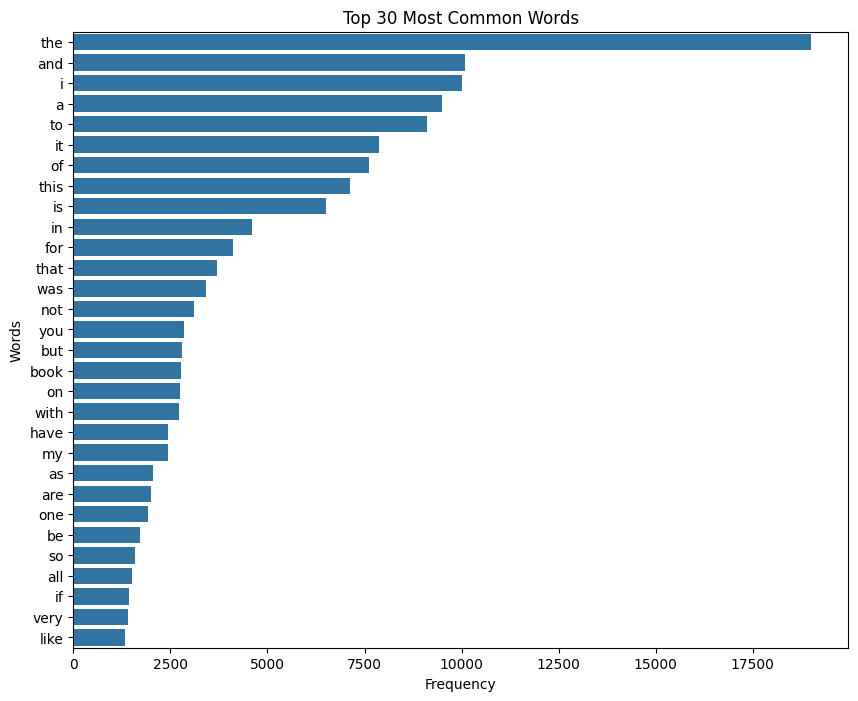

In [21]:
# Top 30 Most Common Words
top_n = 30
top_words = sorted_word_counts[:top_n]
words = [item[0] for item in top_words]
frequencies = [item[1] for item in top_words]

plt.figure(figsize=(10, 8))
sns.barplot(x=frequencies, y=words)
plt.title(f'Top {top_n} Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [22]:
# Number of positive and negative values
classes, counts = np.unique(train_labels,return_counts=True)
class_proportions = counts / counts.sum()
print("Class distribution:")
for _class, proportion in zip(classes, class_proportions):
    print(f"Class {_class}: {proportion:.2f}")

Class distribution:
Class 0: 0.54
Class 1: 0.46


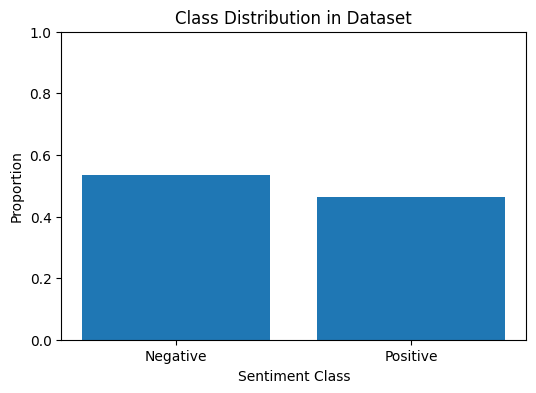

In [23]:
# Visualization for Number of positive and negative values
plt.figure(figsize=(6, 4))
plt.bar(classes, class_proportions, tick_label=["Negative", "Positive"])
plt.title("Class Distribution in Dataset")
plt.xlabel("Sentiment Class")
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.show()

In [24]:
# Generate word cloud for the whole data
all_text = " ".join(text for text in train_texts)

wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue').generate(all_text)

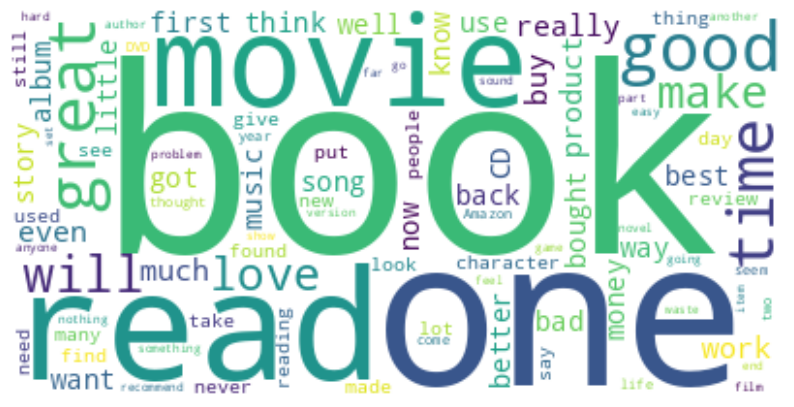

In [25]:
# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Generate Word Clouds for Each Sentiment/Category
positive_texts = " ".join(text for text, label in zip(train_texts, train_labels) if label == 1)
negative_texts = " ".join(text for text, label in zip(train_texts, train_labels) if label == 0)

wordcloud_positive = WordCloud(background_color="white", max_words=500).generate(positive_texts)

wordcloud_negative = WordCloud(background_color="black", max_words=500).generate(negative_texts)


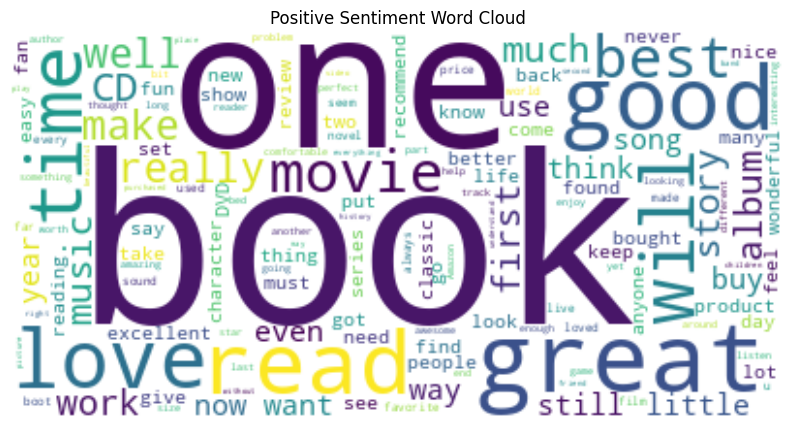

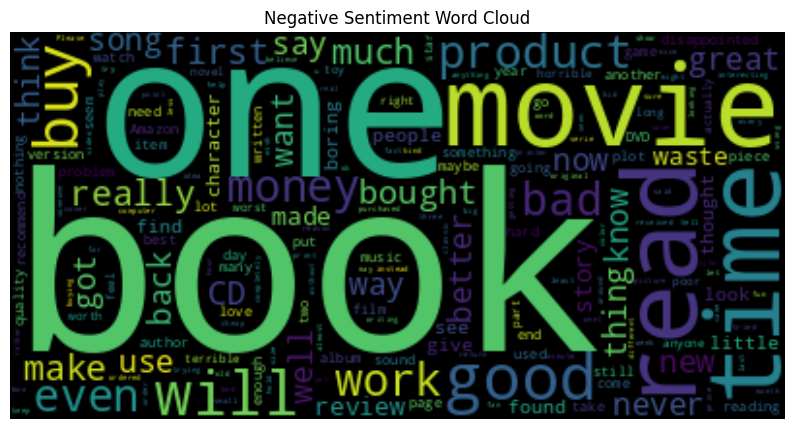

In [27]:
# Visualize the positive nad negative word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")
plt.show()

In [28]:
# Convert lists into a DataFrame
df = pd.DataFrame({
    'text': train_texts,
    'sentiment': train_labels
})

In [29]:
df['word_count'] = df['text'].apply(lambda x: len(x.split())) # Make the words count as a split df
keyword = 'excellent' # If we need to check for a specific word
df[f'contains_{keyword}'] = df['text'].apply(lambda x: keyword in x.lower()).astype(int)

In [30]:
# Data preprocessing

In [31]:
# Generating a validation data

In [32]:
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.2, random_state=42, stratify=train_labels)


In [33]:
print(f"Size of new training set: {len(train_texts)}")
print(f"Size of validation set: {len(val_texts)}")


Size of new training set: 3777
Size of validation set: 945


In [34]:
# Tokenize the data into sequences

In [35]:
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

In [36]:
# Apply Padding

In [37]:
max_len = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in val_sequences), max(len(seq) for seq in test_sequences))
train_padded = pad_sequences(train_sequences, maxlen=max_len)
val_padded = pad_sequences(val_sequences, maxlen=max_len)
test_padded = pad_sequences(test_sequences, maxlen=max_len)

In [38]:
print(train_padded)
print(val_padded)
print(test_padded)

[[    0     0     0 ...   449  1065  2236]
 [    0     0     0 ...   293    76    48]
 [    0     0     0 ...    50   915   286]
 ...
 [    0     0     0 ...  4311     9   264]
 [    0     0     0 ...    70    11 18211]
 [    0     0     0 ...    23    29   338]]
[[   0    0    0 ...   53  158 1892]
 [   0    0    0 ... 3532  790    6]
 [   0    0    0 ...  492   15  304]
 ...
 [   0    0    0 ...   11    4 1421]
 [   0    0    0 ... 2703  133   70]
 [   0    0    0 ...  327    5   39]]
[[    0     0     0 ...    13    12   951]
 [    0     0     0 ...   370   167     6]
 [    0     0     0 ...    91  5419   300]
 ...
 [    0     0     0 ...   176     7   104]
 [    0     0     0 ...    53     6 18849]
 [    0     0     0 ...     0   519  1260]]


In [39]:
print(max_len)

202


In [40]:
# LSTM Model

In [41]:
# model Params

In [42]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 64
max_length = max_len
lstm_units = 32

In [43]:
train_padded = np.array(train_padded).astype('float32')
train_labels = np.array(train_labels).astype('float32')
val_padded = np.array(val_padded).astype('float32')
val_labels = np.array(val_labels).astype('float32')

In [44]:
assert not np.isnan(train_padded).any()
assert not np.isnan(train_labels).any()
assert not np.isnan(val_padded).any()
assert not np.isnan(val_labels).any()

In [45]:
print(vocab_size)

21460


In [46]:
# first Model

In [47]:
model = Sequential([
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_length),
    LSTM(lstm_units,return_sequences=True),
    Dropout(0.2),
    LSTM(lstm_units),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 202, 64)           1373440   
                                                                 
 lstm (LSTM)                 (None, 202, 32)           12416     
                                                                 
 dropout (Dropout)           (None, 202, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [48]:
model.fit(train_padded, np.array(train_labels),epochs=10,validation_data=(val_padded, np.array(val_labels)),batch_size=32)


Epoch 1/10
119/119 [==============================] - 16s 115ms/step - loss: 0.5817 - accuracy: 0.6690 - val_loss: 0.3809 - val_accuracy: 0.8349
Epoch 2/10
119/119 [==============================] - 12s 102ms/step - loss: 0.2307 - accuracy: 0.9132 - val_loss: 0.4220 - val_accuracy: 0.8423
Epoch 3/10
119/119 [==============================] - 12s 101ms/step - loss: 0.0774 - accuracy: 0.9751 - val_loss: 0.4784 - val_accuracy: 0.8180
Epoch 4/10
119/119 [==============================] - 12s 104ms/step - loss: 0.0395 - accuracy: 0.9862 - val_loss: 0.7594 - val_accuracy: 0.8381
Epoch 5/10
119/119 [==============================] - 12s 100ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.9318 - val_accuracy: 0.8434
Epoch 6/10
119/119 [==============================] - 12s 101ms/step - loss: 0.0146 - accuracy: 0.9963 - val_loss: 0.9177 - val_accuracy: 0.8275
Epoch 7/10
119/119 [==============================] - 12s 100ms/step - loss: 0.0077 - accuracy: 0.9971 - val_loss: 0.9194 - val_ac

In [49]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_padded, np.array(test_labels), verbose=0)

# Print the accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 77.24%


In [50]:
# Second model to improve accuracy (We will only increase the epochs)

In [51]:
model = Sequential([
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_length),
    LSTM(lstm_units,return_sequences=True),
    Dropout(0.2),
    LSTM(lstm_units),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 202, 64)           1373440   
                                                                 
 lstm_2 (LSTM)               (None, 202, 32)           12416     
                                                                 
 dropout_2 (Dropout)         (None, 202, 32)           0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [52]:
model.fit(train_padded, np.array(train_labels),epochs=30,validation_data=(val_padded, np.array(val_labels)),batch_size=32)

Epoch 1/30
119/119 [==============================] - 15s 104ms/step - loss: 0.5927 - accuracy: 0.6473 - val_loss: 0.4132 - val_accuracy: 0.8180
Epoch 2/30
119/119 [==============================] - 12s 100ms/step - loss: 0.2541 - accuracy: 0.9052 - val_loss: 0.4010 - val_accuracy: 0.8328
Epoch 3/30
119/119 [==============================] - 12s 100ms/step - loss: 0.1059 - accuracy: 0.9688 - val_loss: 0.5115 - val_accuracy: 0.8381
Epoch 4/30
119/119 [==============================] - 12s 100ms/step - loss: 0.0358 - accuracy: 0.9921 - val_loss: 0.6919 - val_accuracy: 0.8233
Epoch 5/30
119/119 [==============================] - 12s 100ms/step - loss: 0.0115 - accuracy: 0.9984 - val_loss: 0.7938 - val_accuracy: 0.8190
Epoch 6/30
119/119 [==============================] - 12s 100ms/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.9045 - val_accuracy: 0.8243
Epoch 7/30
119/119 [==============================] - 12s 99ms/step - loss: 7.0240e-04 - accuracy: 1.0000 - val_loss: 1.0226 - val

In [53]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_padded, np.array(test_labels), verbose=0)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 79.96%


In [54]:
# Third model (increasing the Epocks and improving the model archeticture)

In [55]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(lstm_units, return_sequences=True)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(lstm_units, return_sequences=True),
    Dropout(0.2),
    LSTM(lstm_units),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 202, 64)           1373440   
                                                                 
 bidirectional (Bidirection  (None, 202, 64)           24832     
 al)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 202, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 198, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 64)            0         
 D)                                                              
                                                                 
 lstm_5 (LSTM)               (None, 49, 32)           

In [56]:
model.fit(train_padded, np.array(train_labels),epochs=30,validation_data=(val_padded, np.array(val_labels)),batch_size=32)

Epoch 1/30
119/119 [==============================] - 22s 141ms/step - loss: 0.5973 - accuracy: 0.6616 - val_loss: 0.3915 - val_accuracy: 0.8265
Epoch 2/30
119/119 [==============================] - 15s 127ms/step - loss: 0.2582 - accuracy: 0.9057 - val_loss: 0.4134 - val_accuracy: 0.8233
Epoch 3/30
119/119 [==============================] - 15s 127ms/step - loss: 0.1089 - accuracy: 0.9717 - val_loss: 0.5471 - val_accuracy: 0.8434
Epoch 4/30
119/119 [==============================] - 16s 133ms/step - loss: 0.0448 - accuracy: 0.9878 - val_loss: 0.5277 - val_accuracy: 0.8286
Epoch 5/30
119/119 [==============================] - 15s 127ms/step - loss: 0.0367 - accuracy: 0.9923 - val_loss: 0.6353 - val_accuracy: 0.8212
Epoch 6/30
119/119 [==============================] - 15s 128ms/step - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.5805 - val_accuracy: 0.8138
Epoch 7/30
119/119 [==============================] - 16s 134ms/step - loss: 0.0140 - accuracy: 0.9963 - val_loss: 0.8623 - val_ac

In [57]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_padded, np.array(test_labels), verbose=0)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 79.63%


144/144 [==============================] - 5s 27ms/step


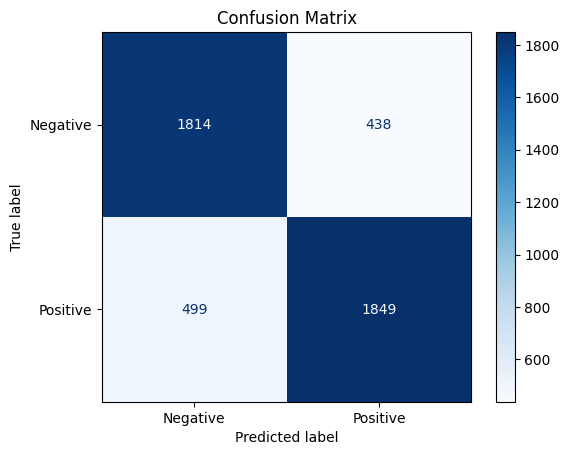

In [58]:
test_predictions_prob = model.predict(test_padded)
test_predictions = (test_predictions_prob > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

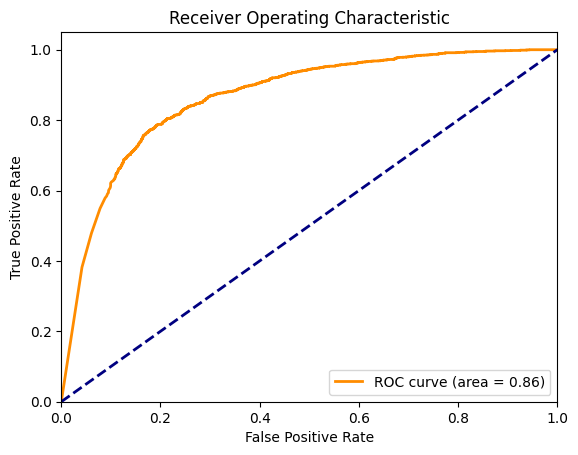

In [59]:
fpr, tpr, _ = roc_curve(test_labels, test_predictions_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

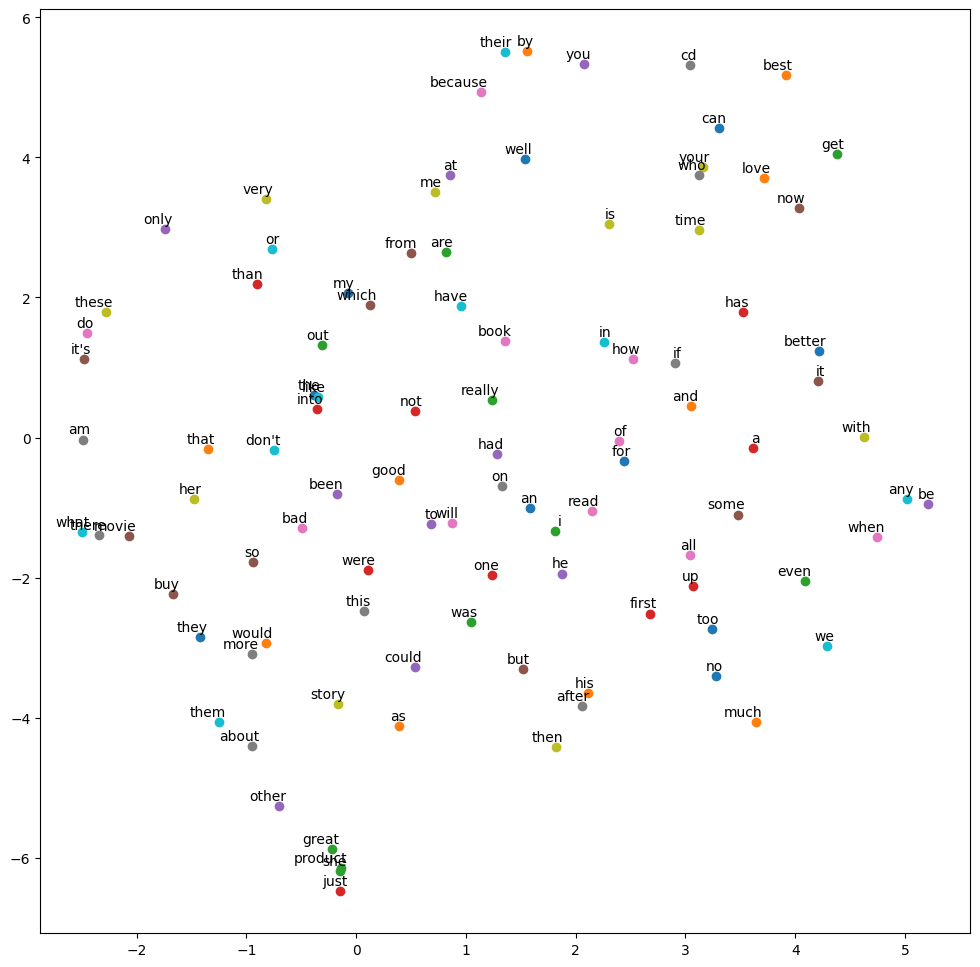

In [64]:

# Assuming you have an Embedding layer as the first layer of your model
word_embeddings = model.layers[0].get_weights()[0]

# Select a subset of words to make visualization clearer
word_embeddings_subset = word_embeddings[:100]  # Adjust as needed
words_labels_subset = list(tokenizer.word_index.keys())[:100]  # Adjust as needed

tsne = TSNE(n_components=2, random_state=42)
words_reduced = tsne.fit_transform(word_embeddings_subset)

plt.figure(figsize=(12, 12))
for i, word in enumerate(words_labels_subset):
    plt.scatter(words_reduced[i, 0], words_reduced[i, 1])
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

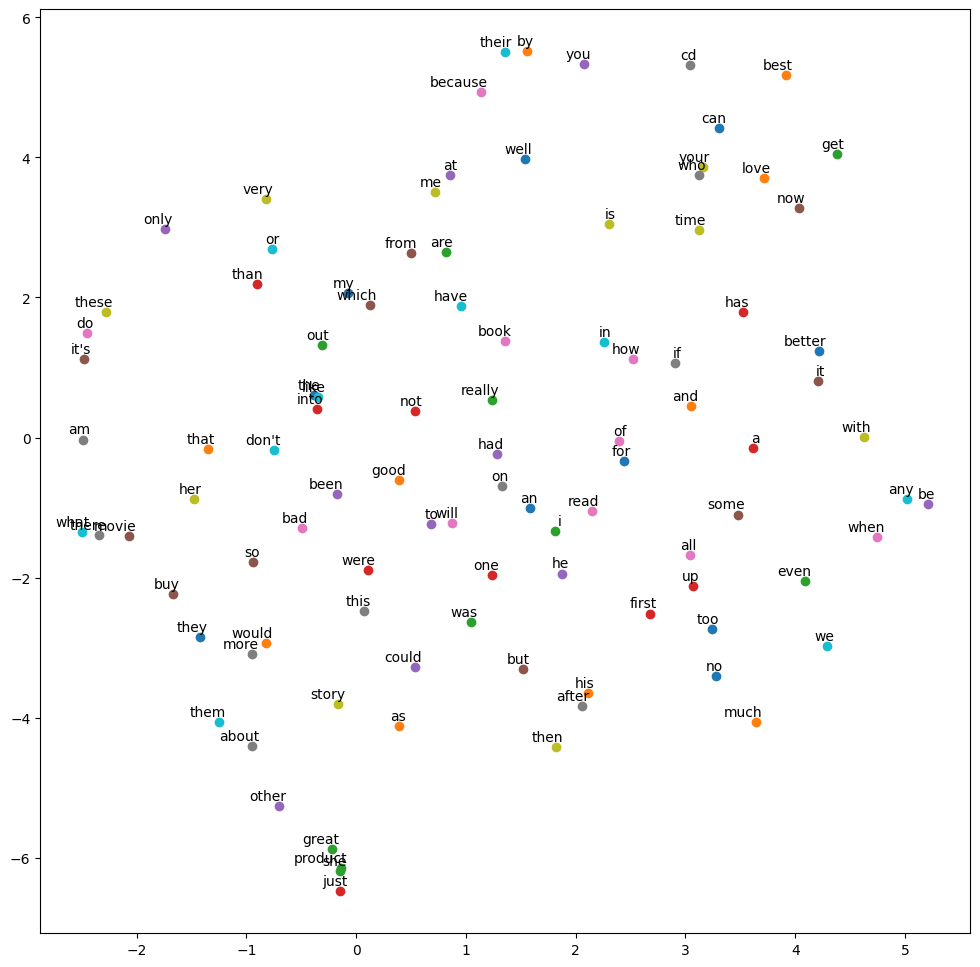

In [67]:

# Assuming you have an Embedding layer as the first layer of your model
word_embeddings = model.layers[0].get_weights()[0]

# Select a subset of words to make visualization clearer
word_embeddings_subset = word_embeddings[:100]  # Adjust as needed
words_labels_subset = list(tokenizer.word_index.keys())[:100]  # Adjust as needed

tsne = TSNE(n_components=2, random_state=42)
words_reduced = tsne.fit_transform(word_embeddings_subset)

plt.figure(figsize=(12, 12))
for i, word in enumerate(words_labels_subset):
    plt.scatter(words_reduced[i, 0], words_reduced[i, 1])
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()